In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Shape Trainingsdaten: {}".format(train_images.shape))
print("Dimension Bild Nr. 5: {}".format(train_images[5].shape))
print("Label zu Bild Nr. 5 {}".format(train_labels[5]))

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')
train_images /= 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')
test_images /= 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

NrTrainimages = train_images.shape[0]
NrTestimages = test_images.shape[0]

print("Trainingsdatensatz: {}".format(train_images.shape))
print("Testdatensatz: {}".format(test_images.shape))
print("Wir haben {} Trainingsbilder und {} Testbilder.".format(NrTrainimages, NrTestimages))

Shape Trainingsdaten: (60000, 28, 28)
Dimension Bild Nr. 5: (28, 28)
Label zu Bild Nr. 5 2
Trainingsdatensatz: (60000, 28, 28, 1)
Testdatensatz: (10000, 28, 28, 1)
Wir haben 60000 Trainingsbilder und 10000 Testbilder.


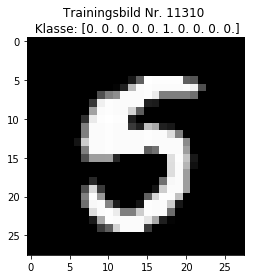

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

# Zufallszahl zwischen 0 und 60000

randindex = random.randint(0, 60000)
plttitle = "Trainingsbild Nr. {} \n Klasse: {}".format(randindex, train_labels[randindex])
plt.imshow(train_images[randindex].reshape(28,28), cmap='gray')
plt.title(plttitle)
plt.show()

In [ ]:
import os
import numpy as np

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K


# Bestimmung des Formats der Eingabedaten
mnist_inputshape = train_images.shape[1:4]

# Die Netzwerkarchitektur
model = Sequential()

# Kodierungsblock
model.add(Conv2D(32, kernel_size=(5,5), activation='relu', input_shape=mnist_inputshape))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv_Block 2
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Prädiktionsblock
model.add(Flatten())
model.add(Dense(128, activation='relu', name='features'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Tensorboard - Vorbereitung
LOGDIR = "logs"
my_tensorboard = TensorBoard(log_dir = LOGDIR, histogram_freq=0, write_graph=True, write_images=True)

# Hyperparamter
my_batch_size = 128
my_num_classes = 10
my_epochs = 12

history = model.fit(train_images, train_labels, batch_size=my_batch_size, callbacks=[my_tensorboard], epochs=my_epochs, verbose=1, validation_data=(test_images, test_labels))



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
features (Dense)             (None, 128)               1